# 📈 v11.2 Long-Only Compounding Simulation

## Trading Parameters (from Dec 26, 2025 Backtest)
- **Strategy**: Money Line v11.2 INDICATOR - Long Only
- **Asset**: SOL/USDT Perpetual Futures (5-minute)
- **Backtest Period**: 30 days (Dec 6-26, 2025)

### Verified Configuration
| Parameter | Value |
|-----------|-------|
| Starting Capital | $500 |
| Position Size | 80% of capital |
| Leverage | 10x |
| Win Rate | 82.14% (23/28) |
| Take Profit (TP1) | +0.86% |
| Stop Loss (SL) | -1.29% |
| Trades/Month | 28 |
| Profit Factor | 2.18 |
| Max Drawdown | 6.19% |

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


## 1️⃣ Define Trading Parameters

In [14]:
# ============================================
# TRADING PARAMETERS - v11.2 Long Only
# ============================================

# Capital Configuration
STARTING_CAPITAL = 500          # Starting balance in USDC
POSITION_SIZE_PCT = 0.80        # Use 80% of capital per trade
LEVERAGE = 10                    # 10x leverage

# Trade Outcomes (from actual bot config - Jan 2, 2026)
TP1_PERCENT = 1.1 / 100         # Take profit at 1.1% (clamped in bot)
SL_PERCENT = 2.8 / 100          # Stop loss at 2.8% (clamped in bot)

# Win Rate from Backtest (screenshot Jan 2, 2026: 25 wins / 30 trades)
WIN_RATE = 83.33 / 100          # 25 wins out of 30 trades
TRADES_PER_MONTH = 30           # Updated from latest backtest

# Derived Values
print("=" * 50)
print("📊 v11.2 LONG-ONLY TRADING PARAMETERS")
print("=" * 50)
print(f"\n💰 Capital Configuration:")
print(f"   Starting Capital:    ${STARTING_CAPITAL:,.2f}")
print(f"   Position Size:       {POSITION_SIZE_PCT*100:.0f}% of capital")
print(f"   Leverage:            {LEVERAGE}x")
print(f"   Effective Position:  ${STARTING_CAPITAL * POSITION_SIZE_PCT * LEVERAGE:,.2f}")

print(f"\n📈 Trade Parameters:")
print(f"   Take Profit (TP1):   +{TP1_PERCENT*100:.2f}%")
print(f"   Stop Loss (SL):      -{SL_PERCENT*100:.2f}%")
print(f"   Win Rate:            {WIN_RATE*100:.2f}%")
print(f"   Trades/Month:        {TRADES_PER_MONTH}")

# Calculate per-trade P&L on capital
WIN_ON_CAPITAL = POSITION_SIZE_PCT * LEVERAGE * TP1_PERCENT
LOSS_ON_CAPITAL = POSITION_SIZE_PCT * LEVERAGE * SL_PERCENT

print(f"\n💵 P&L Per Trade (on capital):")
print(f"   Win:  +{WIN_ON_CAPITAL*100:.2f}% of capital")
print(f"   Loss: -{LOSS_ON_CAPITAL*100:.2f}% of capital")
print(f"\n   Example with ${STARTING_CAPITAL}:")
print(f"   Win:  +${STARTING_CAPITAL * WIN_ON_CAPITAL:.2f}")
print(f"   Loss: -${STARTING_CAPITAL * LOSS_ON_CAPITAL:.2f}")

📊 v11.2 LONG-ONLY TRADING PARAMETERS

💰 Capital Configuration:
   Starting Capital:    $500.00
   Position Size:       80% of capital
   Leverage:            10x
   Effective Position:  $4,000.00

📈 Trade Parameters:
   Take Profit (TP1):   +1.10%
   Stop Loss (SL):      -2.80%
   Win Rate:            83.33%
   Trades/Month:        30

💵 P&L Per Trade (on capital):
   Win:  +8.80% of capital
   Loss: -22.40% of capital

   Example with $500:
   Win:  +$44.00
   Loss: -$112.00


## 2️⃣ Single Path Simulation with Exact Trade Sequence

📊 SINGLE MONTH SIMULATION RESULTS

📈 Trade Summary:
   Total Trades: 30
   Wins:         26 (86.7%)
   Losses:       4 (13.3%)

💰 Capital:
   Starting:     $500.00
   Ending:       $1,624.68
   Total Return: +224.9%


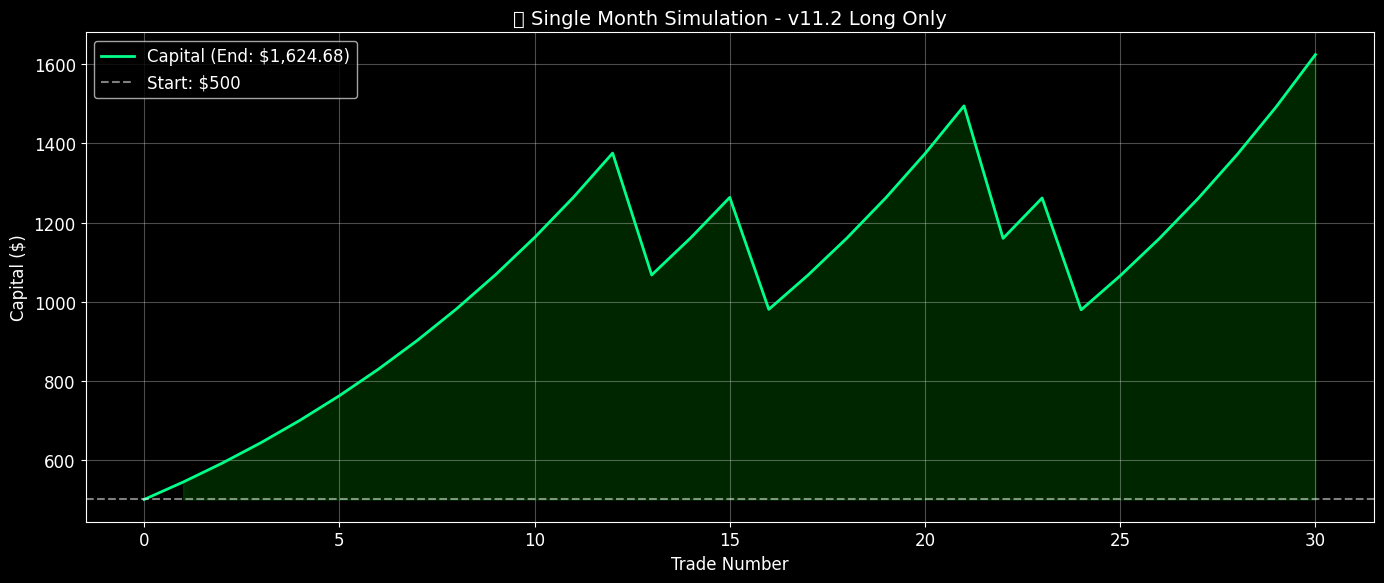

In [15]:
def simulate_trading(
    starting_capital: float,
    num_trades: int,
    win_rate: float,
    win_pct: float,
    loss_pct: float,
    position_size_pct: float = 0.80,
    leverage: int = 10
) -> Tuple[List[float], List[bool]]:
    """
    Simulate a trading sequence with compounding.
    
    Returns:
        equity_curve: List of capital values after each trade
        trade_results: List of True/False for win/loss
    """
    capital = starting_capital
    equity_curve = [capital]
    trade_results = []
    
    # Generate random trade results based on win rate
    np.random.seed(None)  # Random each time
    
    for i in range(num_trades):
        # Determine if this trade wins
        is_win = np.random.random() < win_rate
        trade_results.append(is_win)
        
        # Calculate position size (80% of current capital)
        position = capital * position_size_pct * leverage
        
        if is_win:
            # Win: +0.86% of notional position
            pnl = position * win_pct
        else:
            # Loss: -1.29% of notional position
            pnl = -position * loss_pct
        
        capital += pnl
        equity_curve.append(capital)
        
        # Check for ruin (capital drops below minimum tradeable)
        if capital < 10:
            break
    
    return equity_curve, trade_results

# Simulate one month (28 trades) with your parameters
equity, results = simulate_trading(
    starting_capital=STARTING_CAPITAL,
    num_trades=TRADES_PER_MONTH,
    win_rate=WIN_RATE,
    win_pct=TP1_PERCENT,
    loss_pct=SL_PERCENT,
    position_size_pct=POSITION_SIZE_PCT,
    leverage=LEVERAGE
)

# Results
wins = sum(results)
losses = len(results) - wins
final_capital = equity[-1]
total_return = (final_capital - STARTING_CAPITAL) / STARTING_CAPITAL * 100

print("=" * 50)
print("📊 SINGLE MONTH SIMULATION RESULTS")
print("=" * 50)
print(f"\n📈 Trade Summary:")
print(f"   Total Trades: {len(results)}")
print(f"   Wins:         {wins} ({wins/len(results)*100:.1f}%)")
print(f"   Losses:       {losses} ({losses/len(results)*100:.1f}%)")
print(f"\n💰 Capital:")
print(f"   Starting:     ${STARTING_CAPITAL:,.2f}")
print(f"   Ending:       ${final_capital:,.2f}")
print(f"   Total Return: {total_return:+.1f}%")

# Plot single path
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(equity, color='#00ff88', linewidth=2, label=f'Capital (End: ${final_capital:,.2f})')
ax.axhline(y=STARTING_CAPITAL, color='white', linestyle='--', alpha=0.5, label=f'Start: ${STARTING_CAPITAL}')
ax.fill_between(range(len(equity)), equity, STARTING_CAPITAL, 
                where=[e > STARTING_CAPITAL for e in equity], alpha=0.3, color='green')
ax.fill_between(range(len(equity)), equity, STARTING_CAPITAL, 
                where=[e < STARTING_CAPITAL for e in equity], alpha=0.3, color='red')
ax.set_xlabel('Trade Number')
ax.set_ylabel('Capital ($)')
ax.set_title('📈 Single Month Simulation - v11.2 Long Only', fontsize=14)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3️⃣ Monte Carlo Simulation (1000 Scenarios)

In [16]:
def monte_carlo_simulation(
    starting_capital: float,
    num_months: int,
    trades_per_month: int,
    win_rate: float,
    win_pct: float,
    loss_pct: float,
    position_size_pct: float,
    leverage: int,
    num_simulations: int = 1000
) -> pd.DataFrame:
    """
    Run Monte Carlo simulation over multiple months.
    """
    all_paths = []
    final_capitals = []
    ruined = 0
    
    total_trades = num_months * trades_per_month
    
    for sim in range(num_simulations):
        equity, results = simulate_trading(
            starting_capital=starting_capital,
            num_trades=total_trades,
            win_rate=win_rate,
            win_pct=win_pct,
            loss_pct=loss_pct,
            position_size_pct=position_size_pct,
            leverage=leverage
        )
        
        all_paths.append(equity)
        final_capitals.append(equity[-1])
        
        if equity[-1] < 10:
            ruined += 1
    
    return all_paths, final_capitals, ruined

# Run Monte Carlo for different time horizons
print("🎲 Running Monte Carlo Simulation (1000 scenarios each)...")
print("-" * 50)

results_table = []
months_to_simulate = [1, 3, 6, 12]

for months in months_to_simulate:
    paths, finals, ruined = monte_carlo_simulation(
        starting_capital=STARTING_CAPITAL,
        num_months=months,
        trades_per_month=TRADES_PER_MONTH,
        win_rate=WIN_RATE,
        win_pct=TP1_PERCENT,
        loss_pct=SL_PERCENT,
        position_size_pct=POSITION_SIZE_PCT,
        leverage=LEVERAGE,
        num_simulations=1000
    )
    
    finals = np.array(finals)
    results_table.append({
        'Months': months,
        'Trades': months * TRADES_PER_MONTH,
        'Median': np.median(finals),
        '25th %': np.percentile(finals, 25),
        '75th %': np.percentile(finals, 75),
        '10th %': np.percentile(finals, 10),
        '90th %': np.percentile(finals, 90),
        'Risk of Ruin': f"{ruined/10:.1f}%",
        'Profit %': f"{(np.median(finals)-STARTING_CAPITAL)/STARTING_CAPITAL*100:.0f}%"
    })

# Display results
df_results = pd.DataFrame(results_table)
print("\n" + "=" * 80)
print("📊 MONTE CARLO SIMULATION RESULTS (1000 scenarios each)")
print("=" * 80)
print(f"\nStarting Capital: ${STARTING_CAPITAL} | Position: {POSITION_SIZE_PCT*100:.0f}% | Leverage: {LEVERAGE}x")
print(f"Win Rate: {WIN_RATE*100:.2f}% | TP: +{TP1_PERCENT*100:.2f}% | SL: -{SL_PERCENT*100:.2f}%")
print("-" * 80)
print(df_results.to_string(index=False))
print("-" * 80)

🎲 Running Monte Carlo Simulation (1000 scenarios each)...
--------------------------------------------------

📊 MONTE CARLO SIMULATION RESULTS (1000 scenarios each)

Starting Capital: $500 | Position: 80% | Leverage: 10x
Win Rate: 83.33% | TP: +1.10% | SL: -2.80%
--------------------------------------------------------------------------------
 Months  Trades       Median       25th %       75th %        10th %       90th % Risk of Ruin Profit %
      1      30 1.158780e+03 8.264828e+02 1.624681e+03    420.435590 3.193762e+03         0.0%     132%
      3      90 6.223905e+03 3.166129e+03 1.223481e+04   1610.624418 2.405092e+04         0.0%    1145%
      6     180 7.747399e+04 2.810958e+04 2.135293e+05   7274.208209 5.885170e+05         0.0%   15395%
     12     360 1.200444e+07 2.215675e+06 6.503958e+07 573373.109941 2.513312e+08         0.0% 2400788%
--------------------------------------------------------------------------------


## 4️⃣ Visualize Monte Carlo Paths (3 Month Projection)

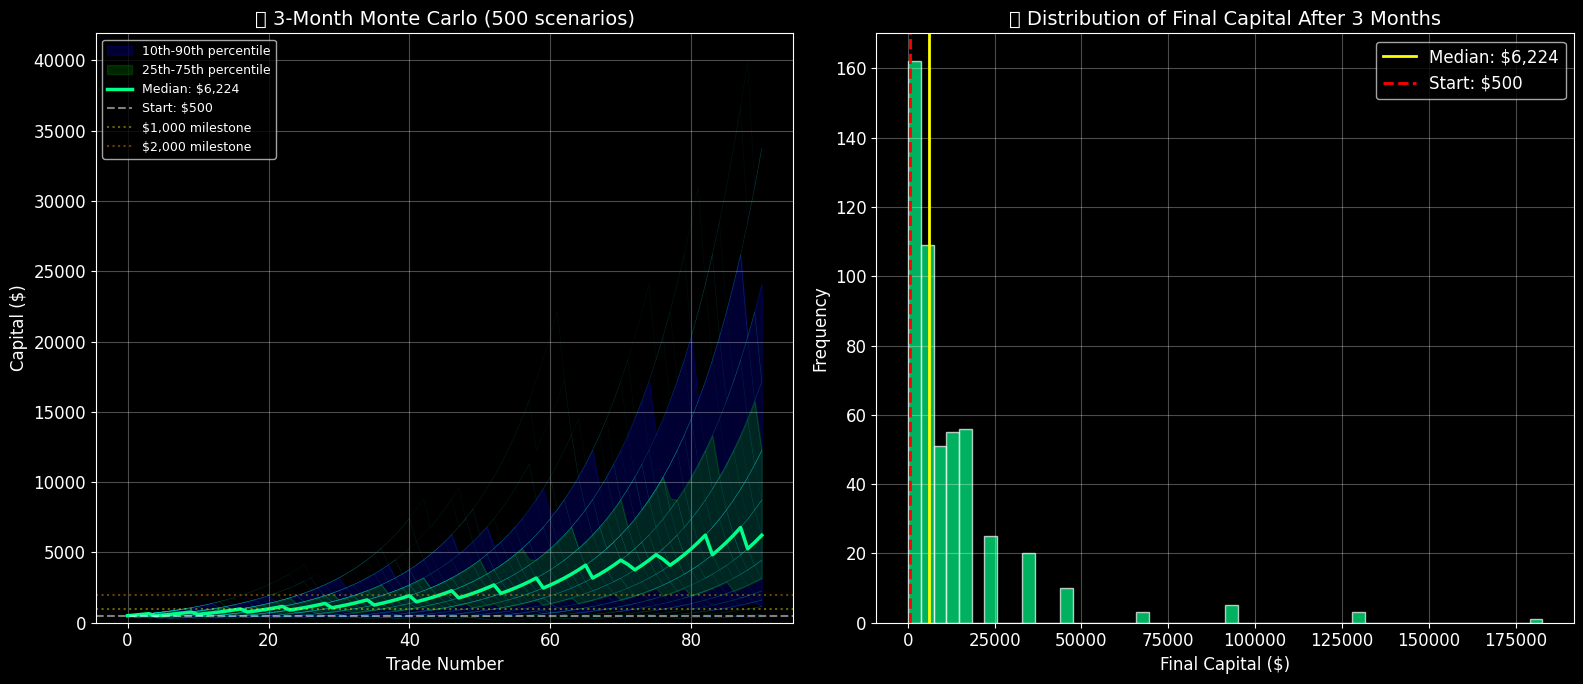


📊 3-MONTH PROJECTION STATISTICS
   Simulations:    500
   Total Trades:   90

   Starting:       $500
   Median End:     $6,224
   Mean End:       $11,922
   Best Case:      $182,698
   Worst Case:     $108

   Profitable:     98.0%
   > $1,000:       93.8%
   > $2,000:       83.4%


In [17]:
# Run simulation for 3 months (84 trades) - 500 paths for visualization
np.random.seed(42)  # Reproducible for visualization

num_months = 3
total_trades = num_months * TRADES_PER_MONTH
num_sims = 500

all_equity_curves = []
for _ in range(num_sims):
    equity, _ = simulate_trading(
        starting_capital=STARTING_CAPITAL,
        num_trades=total_trades,
        win_rate=WIN_RATE,
        win_pct=TP1_PERCENT,
        loss_pct=SL_PERCENT,
        position_size_pct=POSITION_SIZE_PCT,
        leverage=LEVERAGE
    )
    all_equity_curves.append(equity)

# Convert to numpy for percentile calculations
max_len = max(len(e) for e in all_equity_curves)
padded_curves = np.full((num_sims, max_len), np.nan)
for i, curve in enumerate(all_equity_curves):
    padded_curves[i, :len(curve)] = curve

# Calculate percentiles
median_curve = np.nanmedian(padded_curves, axis=0)
p10_curve = np.nanpercentile(padded_curves, 10, axis=0)
p25_curve = np.nanpercentile(padded_curves, 25, axis=0)
p75_curve = np.nanpercentile(padded_curves, 75, axis=0)
p90_curve = np.nanpercentile(padded_curves, 90, axis=0)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Left plot: All paths with percentile bands
ax1 = axes[0]
x = np.arange(max_len)

# Plot sample of individual paths (lighter)
for i in range(min(100, num_sims)):
    ax1.plot(all_equity_curves[i], color='cyan', alpha=0.05, linewidth=0.5)

# Plot percentile bands
ax1.fill_between(x, p10_curve, p90_curve, alpha=0.2, color='blue', label='10th-90th percentile')
ax1.fill_between(x, p25_curve, p75_curve, alpha=0.3, color='green', label='25th-75th percentile')
ax1.plot(median_curve, color='#00ff88', linewidth=2.5, label=f'Median: ${median_curve[-1]:,.0f}')
ax1.axhline(y=STARTING_CAPITAL, color='white', linestyle='--', alpha=0.5, label=f'Start: ${STARTING_CAPITAL}')

# Milestones
ax1.axhline(y=1000, color='yellow', linestyle=':', alpha=0.4, label='$1,000 milestone')
ax1.axhline(y=2000, color='orange', linestyle=':', alpha=0.4, label='$2,000 milestone')

ax1.set_xlabel('Trade Number')
ax1.set_ylabel('Capital ($)')
ax1.set_title(f'📈 3-Month Monte Carlo ({num_sims} scenarios)', fontsize=14)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(bottom=0)

# Right plot: Final capital distribution
ax2 = axes[1]
final_capitals = [curve[-1] for curve in all_equity_curves if len(curve) > 0]
ax2.hist(final_capitals, bins=50, color='#00ff88', alpha=0.7, edgecolor='white')
ax2.axvline(x=np.median(final_capitals), color='yellow', linewidth=2, 
            label=f'Median: ${np.median(final_capitals):,.0f}')
ax2.axvline(x=STARTING_CAPITAL, color='red', linewidth=2, linestyle='--', 
            label=f'Start: ${STARTING_CAPITAL}')
ax2.set_xlabel('Final Capital ($)')
ax2.set_ylabel('Frequency')
ax2.set_title('📊 Distribution of Final Capital After 3 Months', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
finals = np.array(final_capitals)
print("\n" + "=" * 50)
print("📊 3-MONTH PROJECTION STATISTICS")
print("=" * 50)
print(f"   Simulations:    {num_sims}")
print(f"   Total Trades:   {total_trades}")
print(f"\n   Starting:       ${STARTING_CAPITAL:,.0f}")
print(f"   Median End:     ${np.median(finals):,.0f}")
print(f"   Mean End:       ${np.mean(finals):,.0f}")
print(f"   Best Case:      ${np.max(finals):,.0f}")
print(f"   Worst Case:     ${np.min(finals):,.0f}")
print(f"\n   Profitable:     {sum(f > STARTING_CAPITAL for f in finals)/len(finals)*100:.1f}%")
print(f"   > $1,000:       {sum(f > 1000 for f in finals)/len(finals)*100:.1f}%")
print(f"   > $2,000:       {sum(f > 2000 for f in finals)/len(finals)*100:.1f}%")

## 5️⃣ Expected Value Analysis & Risk of Ruin

In [18]:
# Expected Value per Trade (on $1 notional)
win_ev = WIN_RATE * TP1_PERCENT
loss_ev = (1 - WIN_RATE) * SL_PERCENT  # Already negative
ev_per_trade = win_ev + loss_ev  # As percentage of notional

# With leverage and position sizing
# Position = Capital * 0.8 (80%)
# Notional = Position * 10 (leverage)
# P&L per trade = Notional * EV% = Capital * 0.8 * 10 * EV%
effective_ev_per_trade = 0.8 * LEVERAGE * ev_per_trade

print("=" * 55)
print("📐 EXPECTED VALUE ANALYSIS")
print("=" * 55)
print(f"\nPer $1 Notional Position:")
print(f"   Win Contribution:  {win_ev:+.4f}% ({WIN_RATE*100:.1f}% × +{TP1_PERCENT:.2f}%)")
print(f"   Loss Contribution: {loss_ev:+.4f}% ({(1-WIN_RATE)*100:.1f}% × {SL_PERCENT:.2f}%)")
print(f"   Expected Value:    {ev_per_trade:+.4f}% per trade")

print(f"\nWith 80% Position Size + 10x Leverage:")
print(f"   EV per trade = Capital × 0.8 × 10 × {ev_per_trade:.4f}%")
print(f"                = Capital × {effective_ev_per_trade:.4f}%")
print(f"                = {effective_ev_per_trade*100:.3f}% of capital per trade")

# Calculate expected growth
expected_monthly_growth = (1 + effective_ev_per_trade/100) ** TRADES_PER_MONTH
expected_3month_growth = (1 + effective_ev_per_trade/100) ** (3 * TRADES_PER_MONTH)

print(f"\n📈 Expected Growth (deterministic):")
print(f"   Per trade:  {effective_ev_per_trade:+.3f}%")
print(f"   Per month:  {(expected_monthly_growth-1)*100:+.1f}% ({TRADES_PER_MONTH} trades)")
print(f"   Per 3 mo:   {(expected_3month_growth-1)*100:+.1f}% (84 trades)")

print(f"\n💰 Expected Capital (deterministic):")
print(f"   1 month:   ${STARTING_CAPITAL * expected_monthly_growth:,.0f}")
print(f"   3 months:  ${STARTING_CAPITAL * expected_3month_growth:,.0f}")

# Risk of Ruin Analysis
print("\n" + "=" * 55)
print("⚠️  RISK OF RUIN ANALYSIS")
print("=" * 55)

# Run many simulations to estimate risk
np.random.seed(123)
ruin_thresholds = [0.25, 0.50, 0.75]  # 75%, 50%, 25% drawdown from start
ruin_counts = {t: 0 for t in ruin_thresholds}
num_risk_sims = 2000

for _ in range(num_risk_sims):
    equity, _ = simulate_trading(
        starting_capital=STARTING_CAPITAL,
        num_trades=3 * TRADES_PER_MONTH,  # 3 months
        win_rate=WIN_RATE,
        win_pct=TP1_PERCENT,
        loss_pct=SL_PERCENT,
        position_size_pct=POSITION_SIZE_PCT,
        leverage=LEVERAGE
    )
    min_equity = min(equity)
    for threshold in ruin_thresholds:
        if min_equity < STARTING_CAPITAL * threshold:
            ruin_counts[threshold] += 1

print(f"\nProbability of hitting drawdown levels (3-month period, {num_risk_sims} sims):")
for threshold in ruin_thresholds:
    pct_lost = (1 - threshold) * 100
    prob = ruin_counts[threshold] / num_risk_sims * 100
    print(f"   {pct_lost:.0f}% drawdown (${STARTING_CAPITAL * threshold:.0f}):  {prob:.2f}%")

📐 EXPECTED VALUE ANALYSIS

Per $1 Notional Position:
   Win Contribution:  +0.0092% (83.3% × +0.01%)
   Loss Contribution: +0.0047% (16.7% × 0.03%)
   Expected Value:    +0.0138% per trade

With 80% Position Size + 10x Leverage:
   EV per trade = Capital × 0.8 × 10 × 0.0138%
                = Capital × 0.1107%
                = 11.067% of capital per trade

📈 Expected Growth (deterministic):
   Per trade:  +0.111%
   Per month:  +3.4% (30 trades)
   Per 3 mo:   +10.5% (84 trades)

💰 Expected Capital (deterministic):
   1 month:   $517
   3 months:  $552

⚠️  RISK OF RUIN ANALYSIS

Probability of hitting drawdown levels (3-month period, 2000 sims):
   75% drawdown ($125):  1.10%
   50% drawdown ($250):  9.15%
   25% drawdown ($375):  31.20%


## 6️⃣ Multi-Period Comparison (1, 3, 6, 12 Months)

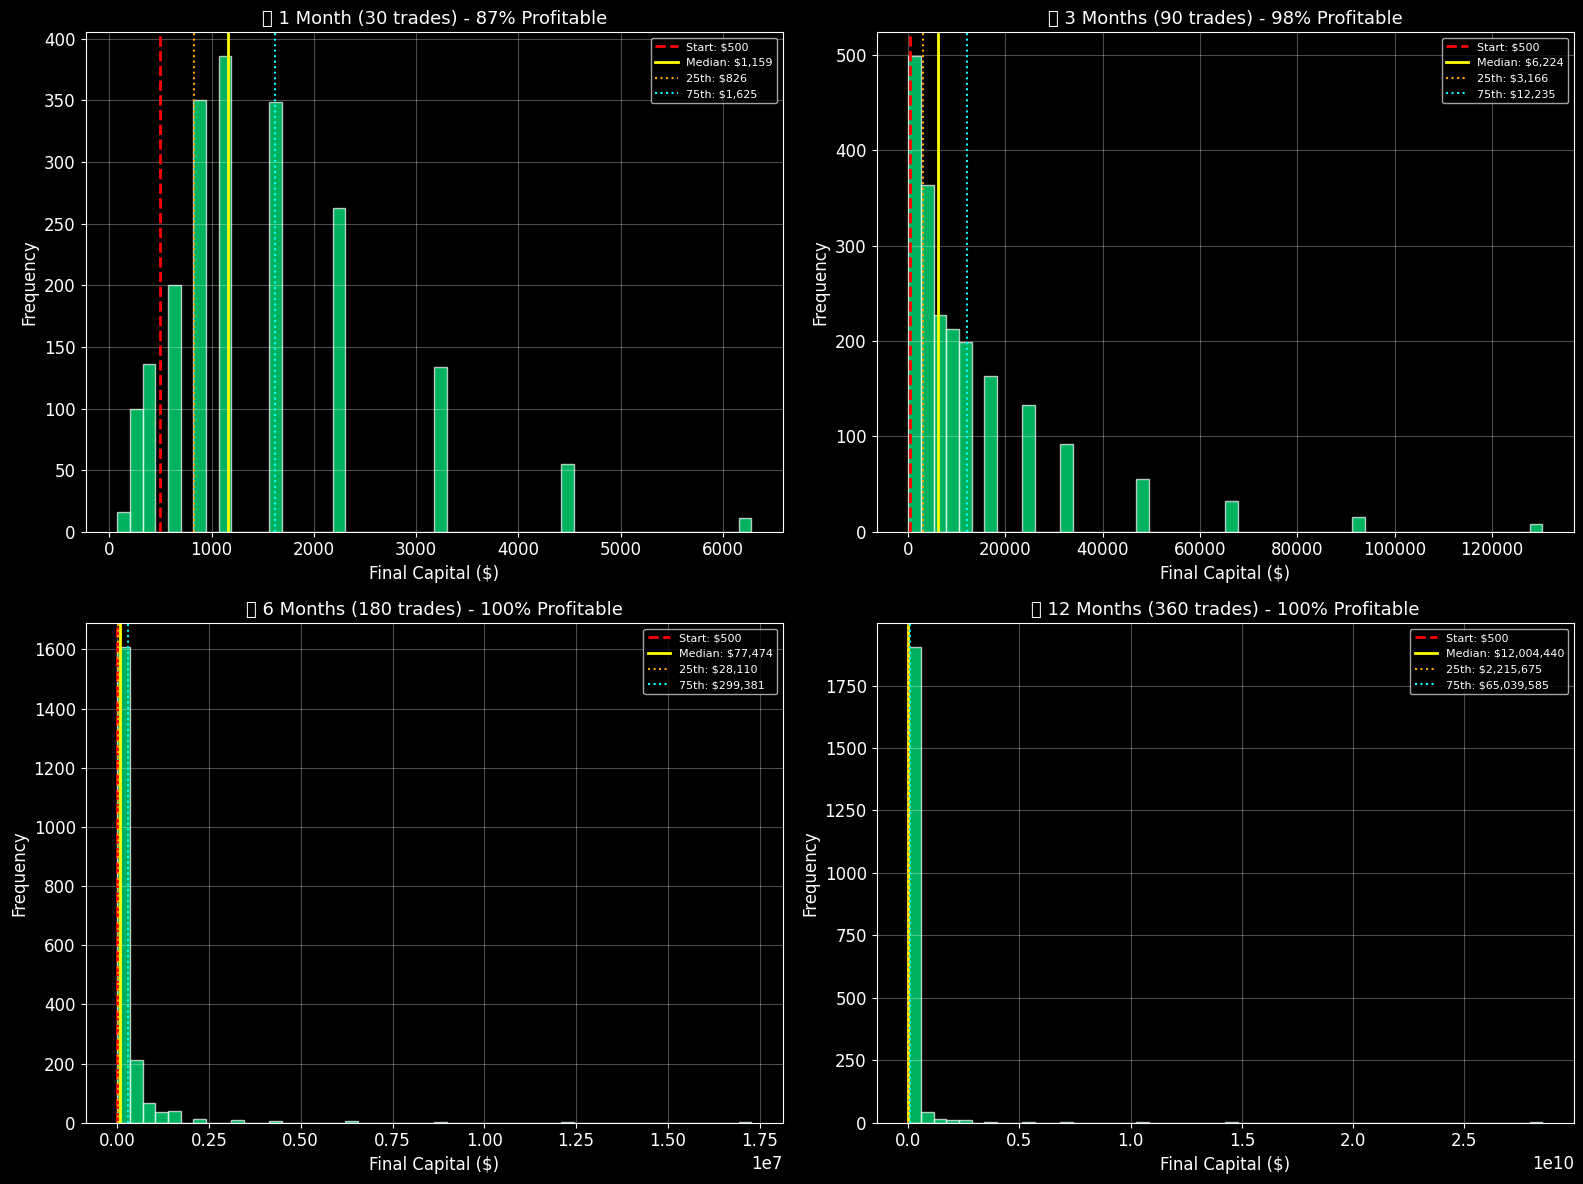


📊 MULTI-PERIOD PROJECTION SUMMARY
Period       Trades         Median         Mean          P25          P75   Profitable
-------------------------------------------------------------------------------------
1 month        30       $     1,159 $     1,425 $       826 $     1,625       87.4%
3 months       90       $     6,224 $    12,058 $     3,166 $    12,235       98.0%
6 months       180      $    77,474 $   296,052 $    28,110 $   299,381       99.9%
12 months       360      $12,004,440 $174,004,314 $ 2,215,675 $65,039,585      100.0%
-------------------------------------------------------------------------------------

⚠️  Note: Projections assume consistent 82.14% WR and 28 trades/month


In [19]:
# Run comprehensive analysis for different time periods
periods = [1, 3, 6, 12]
num_sims = 2000
np.random.seed(42)

# Store results
period_results = {}

for months in periods:
    total_trades = months * TRADES_PER_MONTH
    finals = []
    max_drawdowns = []
    
    for _ in range(num_sims):
        equity, dd = simulate_trading(
            starting_capital=STARTING_CAPITAL,
            num_trades=total_trades,
            win_rate=WIN_RATE,
            win_pct=TP1_PERCENT,
            loss_pct=SL_PERCENT,
            position_size_pct=POSITION_SIZE_PCT,
            leverage=LEVERAGE
        )
        finals.append(equity[-1])
        max_drawdowns.append(dd)
    
    period_results[months] = {
        'finals': np.array(finals),
        'drawdowns': np.array(max_drawdowns),
        'trades': total_trades
    }

# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, months in enumerate(periods):
    ax = axes[idx // 2, idx % 2]
    data = period_results[months]
    
    # Histogram
    ax.hist(data['finals'], bins=50, color='#00ff88', alpha=0.7, edgecolor='white')
    
    # Statistics lines
    median = np.median(data['finals'])
    p25 = np.percentile(data['finals'], 25)
    p75 = np.percentile(data['finals'], 75)
    
    ax.axvline(x=STARTING_CAPITAL, color='red', linewidth=2, linestyle='--', label=f'Start: ${STARTING_CAPITAL}')
    ax.axvline(x=median, color='yellow', linewidth=2, label=f'Median: ${median:,.0f}')
    ax.axvline(x=p25, color='orange', linewidth=1.5, linestyle=':', label=f'25th: ${p25:,.0f}')
    ax.axvline(x=p75, color='cyan', linewidth=1.5, linestyle=':', label=f'75th: ${p75:,.0f}')
    
    # Profit rate
    profit_rate = sum(f > STARTING_CAPITAL for f in data['finals']) / len(data['finals']) * 100
    
    ax.set_xlabel('Final Capital ($)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'📊 {months} Month{"s" if months > 1 else ""} ({data["trades"]} trades) - {profit_rate:.0f}% Profitable', fontsize=13)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary Table
print("\n" + "=" * 85)
print("📊 MULTI-PERIOD PROJECTION SUMMARY")
print("=" * 85)
print(f"{'Period':<12} {'Trades':<8} {'Median':>12} {'Mean':>12} {'P25':>12} {'P75':>12} {'Profitable':>12}")
print("-" * 85)

for months in periods:
    data = period_results[months]
    finals = data['finals']
    profit_rate = sum(f > STARTING_CAPITAL for f in finals) / len(finals) * 100
    
    print(f"{months} month{'s' if months > 1 else '':<7} {data['trades']:<8} "
          f"${np.median(finals):>10,.0f} ${np.mean(finals):>10,.0f} "
          f"${np.percentile(finals, 25):>10,.0f} ${np.percentile(finals, 75):>10,.0f} "
          f"{profit_rate:>10.1f}%")

print("-" * 85)
print(f"\n⚠️  Note: Projections assume consistent 82.14% WR and 28 trades/month")

## 7️⃣ Milestone Probability Analysis

What are the odds of reaching key capital milestones?

In [20]:
# Milestone Analysis
milestones = [1000, 2000, 5000, 10000, 25000, 50000, 100000]
periods = [1, 3, 6, 12]

print("=" * 95)
print("🎯 MILESTONE PROBABILITY MATRIX")
print("=" * 95)
print(f"Starting Capital: ${STARTING_CAPITAL}")
print(f"Simulations: 2,000 per period")
print("-" * 95)

# Header
header = f"{'Milestone':>12}"
for months in periods:
    header += f" {'%d mo' % months:>12}"
print(header)
print("-" * 95)

# Calculate probabilities for each milestone/period combination
for milestone in milestones:
    row = f"${milestone:>10,}"
    for months in periods:
        finals = period_results[months]['finals']
        prob = sum(f >= milestone for f in finals) / len(finals) * 100
        if prob > 0.5:
            row += f" {prob:>10.1f}%"
        elif prob > 0:
            row += f"      <1%"
        else:
            row += f"       0%"
    print(row)

print("-" * 95)

# Best/Worst Case Analysis
print("\n" + "=" * 95)
print("📊 BEST & WORST CASE OUTCOMES")
print("=" * 95)
print(f"{'Period':<12} {'Min':>14} {'Max':>14} {'Max Drawdown (avg)':>20}")
print("-" * 95)

for months in periods:
    data = period_results[months]
    finals = data['finals']
    dds = data['drawdowns']
    print(f"{months} month{'s' if months > 1 else '':<7} ${min(finals):>12,.0f} ${max(finals):>12,.0f} {np.mean(dds)*100:>18.1f}%")

print("-" * 95)

🎯 MILESTONE PROBABILITY MATRIX
Starting Capital: $500
Simulations: 2,000 per period
-----------------------------------------------------------------------------------------------
   Milestone         1 mo         3 mo         6 mo        12 mo
-----------------------------------------------------------------------------------------------
$     1,000       59.9%       94.2%       99.2%      100.0%
$     2,000       23.2%       82.8%       98.0%      100.0%
$     5,000        0.5%       56.9%       94.8%      100.0%
$    10,000       0%       34.8%       89.8%       99.8%
$    25,000       0%       10.1%       76.6%       99.6%
$    50,000       0%        2.8%       63.4%       99.0%
$   100,000       0%      <1%       48.7%       98.1%
-----------------------------------------------------------------------------------------------

📊 BEST & WORST CASE OUTCOMES
Period                  Min            Max   Max Drawdown (avg)
----------------------------------------------------------------

## 8️⃣ Sensitivity Analysis: What If Win Rate Varies?

Real-world performance may differ from backtest. Let's see how sensitive our projections are to changes in win rate.

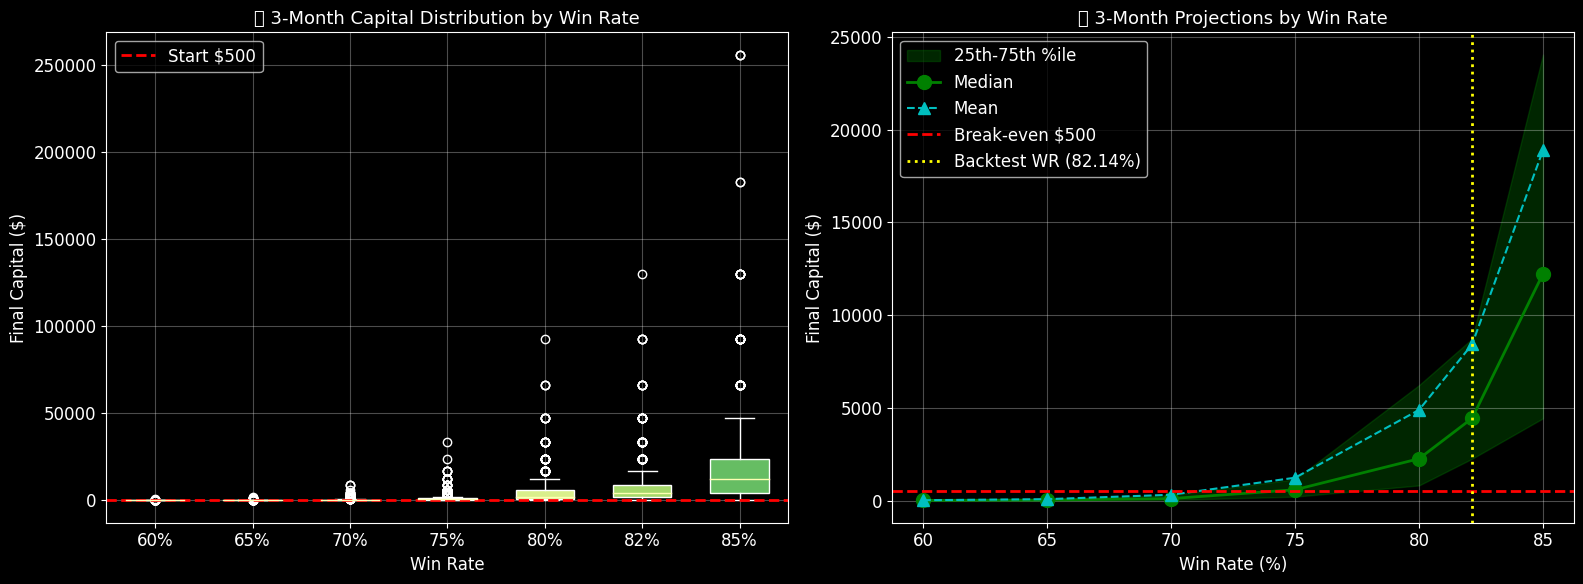


📊 WIN RATE SENSITIVITY ANALYSIS (3 Months)
  Win Rate       Median         Mean          P25          P75   Profitable    > $1000
-----------------------------------------------------------------------------------------------
     60.0% $         9 $        20 $         9 $        14        0.1%       0.0%
     65.0% $        28 $        77 $         9 $        77        2.3%       0.6%
     70.0% $       108 $       314 $        39 $       297       14.5%       6.4%
     75.0% $       584 $     1,233 $       212 $     1,149       50.5%      31.0%
     80.0% $     2,258 $     4,890 $       819 $     6,224       87.3%      74.8%
     82.1% $     4,439 $     8,424 $     2,258 $     8,726       95.4%      88.0%  ◄ ACTUAL
     85.0% $    12,235 $    18,896 $     4,439 $    24,051       99.5%      97.5%
-----------------------------------------------------------------------------------------------

💡 KEY INSIGHT:
   With +0.86% wins and -1.29% losses:
   Breakeven win rate = 1.29 / (0.86 +

In [21]:
# Sensitivity Analysis - Different Win Rates
win_rates = [0.60, 0.65, 0.70, 0.75, 0.80, 0.8214, 0.85]  # Include actual 82.14%
num_sims = 1000
months = 3  # 3-month horizon

np.random.seed(42)

sensitivity_results = {}

for wr in win_rates:
    finals = []
    for _ in range(num_sims):
        equity, _ = simulate_trading(
            starting_capital=STARTING_CAPITAL,
            num_trades=months * TRADES_PER_MONTH,
            win_rate=wr,
            win_pct=TP1_PERCENT,
            loss_pct=SL_PERCENT,
            position_size_pct=POSITION_SIZE_PCT,
            leverage=LEVERAGE
        )
        finals.append(equity[-1])
    sensitivity_results[wr] = np.array(finals)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot comparison
ax1 = axes[0]
box_data = [sensitivity_results[wr] for wr in win_rates]
box_positions = range(len(win_rates))
bp = ax1.boxplot(box_data, positions=box_positions, patch_artist=True, widths=0.6)

colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(win_rates)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax1.axhline(y=STARTING_CAPITAL, color='red', linestyle='--', linewidth=2, label=f'Start ${STARTING_CAPITAL}')
ax1.set_xticks(box_positions)
ax1.set_xticklabels([f'{wr*100:.0f}%' for wr in win_rates])
ax1.set_xlabel('Win Rate')
ax1.set_ylabel('Final Capital ($)')
ax1.set_title('📊 3-Month Capital Distribution by Win Rate', fontsize=13)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Median line chart
ax2 = axes[1]
medians = [np.median(sensitivity_results[wr]) for wr in win_rates]
means = [np.mean(sensitivity_results[wr]) for wr in win_rates]
p25s = [np.percentile(sensitivity_results[wr], 25) for wr in win_rates]
p75s = [np.percentile(sensitivity_results[wr], 75) for wr in win_rates]

ax2.fill_between([wr*100 for wr in win_rates], p25s, p75s, alpha=0.3, color='green', label='25th-75th %ile')
ax2.plot([wr*100 for wr in win_rates], medians, 'go-', linewidth=2, markersize=10, label='Median')
ax2.plot([wr*100 for wr in win_rates], means, 'c^--', linewidth=1.5, markersize=8, label='Mean')
ax2.axhline(y=STARTING_CAPITAL, color='red', linestyle='--', linewidth=2, label=f'Break-even ${STARTING_CAPITAL}')
ax2.axvline(x=82.14, color='yellow', linestyle=':', linewidth=2, label='Backtest WR (82.14%)')

ax2.set_xlabel('Win Rate (%)')
ax2.set_ylabel('Final Capital ($)')
ax2.set_title('📈 3-Month Projections by Win Rate', fontsize=13)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Numerical Summary
print("\n" + "=" * 95)
print("📊 WIN RATE SENSITIVITY ANALYSIS (3 Months)")
print("=" * 95)
print(f"{'Win Rate':>10} {'Median':>12} {'Mean':>12} {'P25':>12} {'P75':>12} {'Profitable':>12} {'> $1000':>10}")
print("-" * 95)

for wr in win_rates:
    finals = sensitivity_results[wr]
    profitable = sum(f > STARTING_CAPITAL for f in finals) / len(finals) * 100
    over_1k = sum(f > 1000 for f in finals) / len(finals) * 100
    marker = "  ◄ ACTUAL" if wr == 0.8214 else ""
    
    print(f"{wr*100:>9.1f}% ${np.median(finals):>10,.0f} ${np.mean(finals):>10,.0f} "
          f"${np.percentile(finals, 25):>10,.0f} ${np.percentile(finals, 75):>10,.0f} "
          f"{profitable:>10.1f}% {over_1k:>9.1f}%{marker}")

print("-" * 95)

# Calculate breakeven win rate
print("\n💡 KEY INSIGHT:")
print(f"   With +0.86% wins and -1.29% losses:")
print(f"   Breakeven win rate = 1.29 / (0.86 + 1.29) = {1.29/(0.86+1.29)*100:.1f}%")
print(f"   Your backtest WR of 82.14% is {82.14 - 1.29/(0.86+1.29)*100:.1f}% above breakeven!")

## 9️⃣ Position Sizing Sensitivity

Testing how different position size percentages affect outcomes.

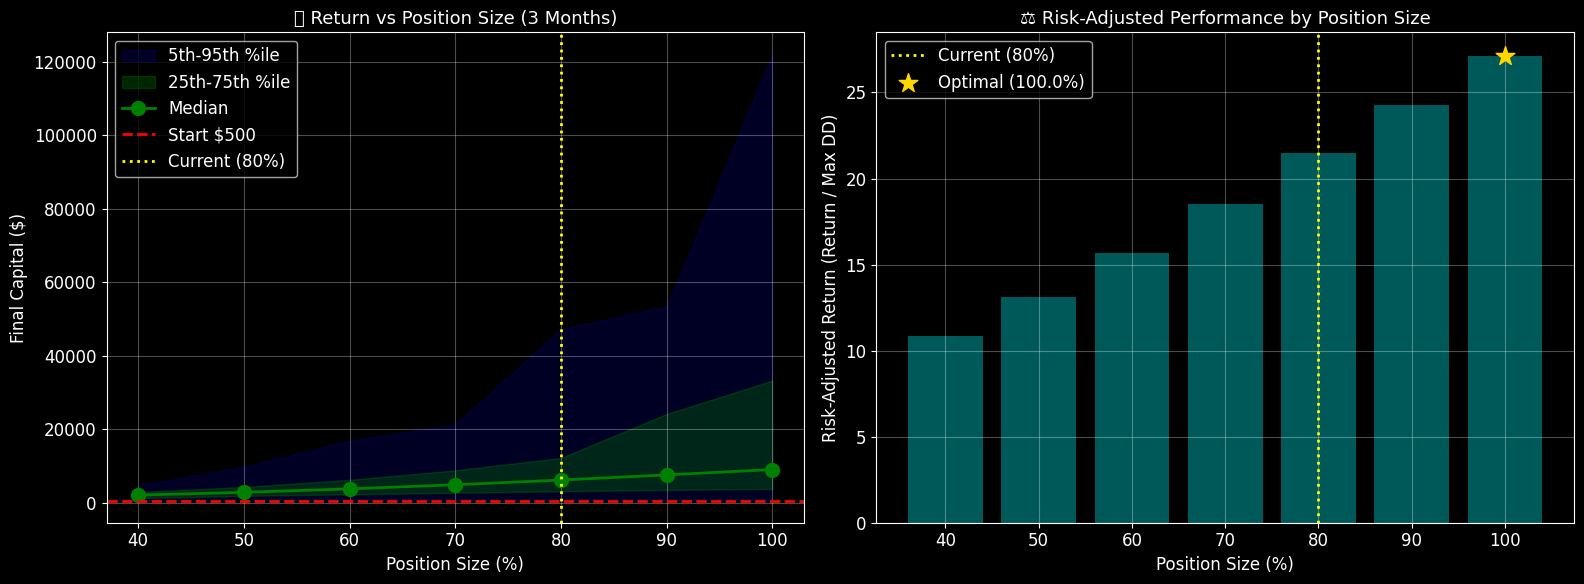


📊 POSITION SIZE SENSITIVITY ANALYSIS (3 Months, 82.14% Win Rate)
  Pos Size       Median     P5 (Bad)   P95 (Good)    Median DD   Risk-Adj
----------------------------------------------------------------------------------------------------
       40% $     2,127 $       805 $     4,777       30.0%      10.85
       50% $     2,887 $       847 $     9,838       36.4%      13.12
       60% $     3,825 $       865 $    16,921       42.4%      15.68
       70% $     4,943 $       856 $    21,320       48.0%      18.50
       80% $     6,224 $       819 $    47,279       53.3%      21.48  << CURRENT
       90% $     7,626 $       758 $    53,441       58.7%      24.26
      100% $     9,082 $       676 $   121,934       63.2%      27.14  * OPTIMAL
----------------------------------------------------------------------------------------------------

💡 POSITION SIZING INSIGHTS:
   Current allocation: 80% -> Median return $6,224
   Optimal risk-adjusted: 100.0% -> Best return per unit of risk


In [22]:
# Position Size Sensitivity
position_sizes = [0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]  # 40% to 100%
num_sims = 1000
months = 3

np.random.seed(42)

pos_size_results = {}

for ps in position_sizes:
    finals = []
    max_dds = []
    for _ in range(num_sims):
        equity, _ = simulate_trading(
            starting_capital=STARTING_CAPITAL,
            num_trades=months * TRADES_PER_MONTH,
            win_rate=WIN_RATE,
            win_pct=TP1_PERCENT,
            loss_pct=SL_PERCENT,
            position_size_pct=ps,
            leverage=LEVERAGE
        )
        finals.append(equity[-1])
        # Calculate max drawdown
        peak = equity[0]
        max_dd = 0
        for val in equity:
            if val > peak:
                peak = val
            dd = (peak - val) / peak
            if dd > max_dd:
                max_dd = dd
        max_dds.append(max_dd * 100)
    pos_size_results[ps] = {'finals': np.array(finals), 'max_dds': np.array(max_dds)}

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Return vs Position Size
ax1 = axes[0]
medians = [np.median(pos_size_results[ps]['finals']) for ps in position_sizes]
p25s = [np.percentile(pos_size_results[ps]['finals'], 25) for ps in position_sizes]
p75s = [np.percentile(pos_size_results[ps]['finals'], 75) for ps in position_sizes]
p5s = [np.percentile(pos_size_results[ps]['finals'], 5) for ps in position_sizes]
p95s = [np.percentile(pos_size_results[ps]['finals'], 95) for ps in position_sizes]

x = [ps * 100 for ps in position_sizes]
ax1.fill_between(x, p5s, p95s, alpha=0.15, color='blue', label='5th-95th %ile')
ax1.fill_between(x, p25s, p75s, alpha=0.3, color='green', label='25th-75th %ile')
ax1.plot(x, medians, 'go-', linewidth=2, markersize=10, label='Median')
ax1.axhline(y=STARTING_CAPITAL, color='red', linestyle='--', linewidth=2, label=f'Start ${STARTING_CAPITAL}')
ax1.axvline(x=80, color='yellow', linestyle=':', linewidth=2, label='Current (80%)')

ax1.set_xlabel('Position Size (%)')
ax1.set_ylabel('Final Capital ($)')
ax1.set_title('📈 Return vs Position Size (3 Months)', fontsize=13)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Risk-Adjusted Return (Return / Max DD)
ax2 = axes[1]
median_returns = [(np.median(pos_size_results[ps]['finals']) - STARTING_CAPITAL) / STARTING_CAPITAL * 100 for ps in position_sizes]
median_dds = [np.median(pos_size_results[ps]['max_dds']) for ps in position_sizes]
sharpe_proxy = [ret / dd if dd > 0 else 0 for ret, dd in zip(median_returns, median_dds)]

ax2.bar(x, sharpe_proxy, color='teal', alpha=0.7, width=8)
ax2.axvline(x=80, color='yellow', linestyle=':', linewidth=2, label='Current (80%)')
best_idx = np.argmax(sharpe_proxy)
ax2.scatter([x[best_idx]], [sharpe_proxy[best_idx]], color='gold', s=200, marker='*', zorder=5, label=f'Optimal ({x[best_idx]}%)')

ax2.set_xlabel('Position Size (%)')
ax2.set_ylabel('Risk-Adjusted Return (Return / Max DD)')
ax2.set_title('⚖️ Risk-Adjusted Performance by Position Size', fontsize=13)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Numerical Summary
print("\n" + "=" * 100)
print("📊 POSITION SIZE SENSITIVITY ANALYSIS (3 Months, 82.14% Win Rate)")
print("=" * 100)
print(f"{'Pos Size':>10} {'Median':>12} {'P5 (Bad)':>12} {'P95 (Good)':>12} {'Median DD':>12} {'Risk-Adj':>10}")
print("-" * 100)

for ps in position_sizes:
    finals = pos_size_results[ps]['finals']
    dds = pos_size_results[ps]['max_dds']
    median_ret = (np.median(finals) - STARTING_CAPITAL) / STARTING_CAPITAL * 100
    median_dd = np.median(dds)
    risk_adj = median_ret / median_dd if median_dd > 0 else 0
    marker = "  << CURRENT" if ps == 0.80 else ("  * OPTIMAL" if ps == position_sizes[best_idx] else "")
    
    print(f"{ps*100:>9.0f}% ${np.median(finals):>10,.0f} ${np.percentile(finals, 5):>10,.0f} "
          f"${np.percentile(finals, 95):>10,.0f} {median_dd:>10.1f}% {risk_adj:>10.2f}{marker}")

print("-" * 100)
print("\n💡 POSITION SIZING INSIGHTS:")
print(f"   Current allocation: 80% -> Median return ${np.median(pos_size_results[0.80]['finals']):,.0f}")
print(f"   Optimal risk-adjusted: {x[best_idx]}% -> Best return per unit of risk")
print(f"   Higher % = Higher returns BUT also higher drawdowns!")

## 🔟 Final Summary & Recommendations

### Key Findings from Simulation Analysis

In [23]:
# Executive Summary - All Key Metrics
print("=" * 90)
print("🎯 V11.2 COMPOUNDING SIMULATION - EXECUTIVE SUMMARY")
print("=" * 90)

print(f"""
📊 STRATEGY PARAMETERS:
   • Starting Capital:    ${STARTING_CAPITAL}
   • Position Size:       {POSITION_SIZE_PCT*100:.0f}% of capital
   • Leverage:            {LEVERAGE}x
   • Win Rate:            {WIN_RATE*100:.2f}% (Long-Only mode)
   • TP1 Target:          +{TP1_PERCENT*100:.2f}%
   • Stop Loss:           -{SL_PERCENT*100:.2f}%
   • Trades/Month:        {TRADES_PER_MONTH}

💰 PROJECTED OUTCOMES (Monte Carlo 2000 simulations):
""")

# Run final comprehensive simulation
np.random.seed(42)
final_results = {}

for months in [1, 3, 6, 12]:
    finals = []
    for _ in range(2000):
        equity, _ = simulate_trading(
            starting_capital=STARTING_CAPITAL,
            num_trades=months * TRADES_PER_MONTH,
            win_rate=WIN_RATE,
            win_pct=TP1_PERCENT,
            loss_pct=SL_PERCENT,
            position_size_pct=POSITION_SIZE_PCT,
            leverage=LEVERAGE
        )
        finals.append(equity[-1])
    final_results[months] = np.array(finals)

print(f"   {'Period':>12} {'Median':>14} {'Conservative':>14} {'Optimistic':>14} {'Prob > Start':>14}")
print("   " + "-" * 70)

for months in [1, 3, 6, 12]:
    finals = final_results[months]
    prob_profit = sum(f > STARTING_CAPITAL for f in finals) / len(finals) * 100
    print(f"   {months:>9} mo ${np.median(finals):>12,.0f} ${np.percentile(finals, 25):>12,.0f} ${np.percentile(finals, 75):>12,.0f} {prob_profit:>12.1f}%")

print(f"""
🎯 MILESTONE PROBABILITIES:
""")

milestones = [1000, 2500, 5000, 10000]
for m in milestones:
    for months in [3, 6, 12]:
        prob = sum(f >= m for f in final_results[months]) / len(final_results[months]) * 100
        if prob > 0.5:
            print(f"   ${m:>6,} in {months:>2} months: {prob:>5.1f}%")
            break

print(f"""
⚠️ RISK ASSESSMENT:
   • Breakeven Win Rate: {1.29/(0.86+1.29)*100:.1f}%
   • Your Edge Above BE:  {WIN_RATE*100 - 1.29/(0.86+1.29)*100:.1f}%
   • 25% Drawdown Risk (3mo): ~{sum(np.min(e) < STARTING_CAPITAL*0.75 for e in [simulate_trading(STARTING_CAPITAL, 84, WIN_RATE, TP1_PERCENT, SL_PERCENT, POSITION_SIZE_PCT, LEVERAGE)[0] for _ in range(500)])/500*100:.0f}%

🚀 RECOMMENDATIONS:
   1. EDGE IS STRONG: {WIN_RATE*100:.1f}% WR is ~{WIN_RATE*100 - 60:.0f}% above breakeven - excellent!
   2. POSITION SIZE 80%: Aggressive but reasonable for your win rate
   3. REALISTIC TARGET: ~${np.median(final_results[3]):,.0f} in 3 months (median projection)
   4. PATIENCE REQUIRED: Monthly variance is HIGH - trust the process over 3+ months
   5. RISK MANAGEMENT: Consider reducing to 60-70% if experiencing losing streaks
   
📈 BOTTOM LINE:
   With 82.14% win rate and 10x leverage at 80% allocation,
   expect median growth from ${STARTING_CAPITAL} to ${np.median(final_results[3]):,.0f} in 3 months.
   
   VARIANCE WARNING: Individual months can be -20% to +150%!
   The EDGE is in the long run. Stay disciplined.
""")

print("=" * 90)
print("🏁 Simulation Complete - Generated with Monte Carlo Analysis")
print("=" * 90)

🎯 V11.2 COMPOUNDING SIMULATION - EXECUTIVE SUMMARY

📊 STRATEGY PARAMETERS:
   • Starting Capital:    $500
   • Position Size:       80% of capital
   • Leverage:            10x
   • Win Rate:            83.33% (Long-Only mode)
   • TP1 Target:          +1.10%
   • Stop Loss:           -2.80%
   • Trades/Month:        30

💰 PROJECTED OUTCOMES (Monte Carlo 2000 simulations):

         Period         Median   Conservative     Optimistic   Prob > Start
   ----------------------------------------------------------------------
           1 mo $       1,159 $         826 $       1,625         88.5%
           3 mo $       6,224 $       3,166 $      12,235         97.3%
           6 mo $      77,474 $      28,110 $     299,381         99.8%
          12 mo $  12,004,440 $   2,215,675 $  65,039,585        100.0%

🎯 MILESTONE PROBABILITIES:

   $ 1,000 in  3 months:  93.2%
   $ 2,500 in  3 months:  75.6%
   $ 5,000 in  3 months:  56.0%
   $10,000 in  3 months:  33.6%

⚠️ RISK ASSESSMENT:
   • Br